In [1]:
from src.setup import *
from src.dermatology import *

# Value Imputation

_I'm a substitute for another guy_<br>
_I look pretty tall but my heels are high_<br>
_The simple things you see are all complicated_<br>
_I look pretty young, but I'm just back-dated, yeah_<br>

–Pete Townsend

Data can be missing or untrusted in a variety of ways, and for a variety of reasons.  We outlines many of these in the lessons on *Anomaly Detection* and *Data Quality*.  

Sometimes your best option for dealing with bad data is simply to discard it.  Many times it is more useful to impute values in some manner, in order to retain the rest of the features within an observation. For this lesson, I'll assume that all the data identified as untrusted—even if initially present—have already been explicitly marked as missing.

When imputing data, it is important to keep a good record of the difference between values you imputed versus those in original data set.  Two approaches to data provenance are:

1. Explicit annotation to each data item imputed.
2. Maintaining versions of your data as you clean them in various ways.

The decision to impute values versus discard records need not be all or nothing.  It might be the case that we have decided that some records are possible or desirable to save and others are not.  Several considerations are generally present in our decision, whether done by record or for the problem generally.  The predominant emphasis in these considerations assumes a machine learning use of a data set; visualization or analytics that are not "machine learning" per se worry about imputation much less often, but definitely sometimes.  Some issues to consider include:

* Do you have *a lot* of data?

If your data is limited, conserving every record possible can be especially important.  Machine learning models, *mutatis mutandis*, are that much happier the more data they have to work with.  If you have millions—or even tens of thousands—of records left after you discard those with missing data, you may be able to worry less about imputation.  If you only have hundreds of records, every one feels precious.

* Do you have knowledge or suspicion that missing data occurs in a biased way? 

If the missing records are likely to concern observations that have a different characteristic or pattern than the overall data set, it can be especially important to salvage them.  Perhaps one sensor location or one time frame is closely associated with missing data. That location or time is likely to be needed to well capture some aspect of the domain modeled.

You may decide that it is OK to discard those records with missing data that belong to the "random flaw" subset, but that those records with systematic missing data are crucial since they address a different region of the parameter space of the problem.

* Do your records have many or few features?

A record with five features and two of them missing is unlikely to retain much useful weight for good models.  A record with one feature missing out of fifty or a thousand is much more likely to be worth remediating.

* What is the role of the missing value?

If the target feature is missing from a supervised learning training set—i.e. for a classification or regression problem—imputation is very unlikely to do you much good.  It is much more likely to be useful to impute an input feature.  

The role of an input feature is problem and domain specific. A particular feature can be pivotal from a "business purpose" perspective, whether or not it is actually the most predictive feature.  Imputing a feature of central task importance is generally unwise.

## Typical-value Imputation

_And there's another marketing ploy_<br/>
_Typical girl gets the typical boy_<br/>

–Ari Up, Paloma McLardy, Tessa Pollitt, and Viv Albertine

Pretty much the simplest thing we can do is to assume that a missing value is similar to the general trend for that same feature.  In some cases, domain knowledge may inform us as to what a reasonable default is, even without specific information about a particular record.  Absent that background, the data that exists in a record can provide guidance for imputation.

## Typical Tabular Data

In [2]:
GT(df.iloc[:, [10, 0, 1, 2, 3, 15, -2, -1]].sample(10))

family history,erythema,scaling,definite borders,itching,exocytosis,Age,TARGET
0,2,2,2,0,0,62,psoriasis
0,2,2,2,2,3,44,lichen planus
0,3,2,0,1,3,30,seboreic dermatitis
0,3,2,2,2,2,22,lichen planus
0,3,2,2,1,1,47,seboreic dermatitis
0,2,1,1,3,0,19,cronic dermatitis
0,2,3,2,0,0,33,psoriasis
0,3,2,0,3,3,52,seboreic dermatitis
0,2,2,2,1,2,25,seboreic dermatitis
0,2,3,2,0,2,41,seboreic dermatitis


Let's look at the [Dermatology Data Set](https://archive.ics.uci.edu/ml/datasets/Dermatology) available from the UCI Machine Learning Repository. This data contains 34 measurements of 366 patients, with each one diagnosed as having one of six skin conditions. Most of the features are ordinal coded measures of the severity of one feature observed.

In [3]:
clean, suspicious = [], {}
for col in df.columns:
    values = df[col].unique()
    if set(values) <= {0, 1, 2, 3}:
        clean.append(col)
    else:
        suspicious[col] = values

A quick view of sample rows does not reveal obviously missing data.  We can investigate further to identify likely missing data.  From the metadata descriptions provided with the data set, we know that observed severities are intended to be encoded as 0, 1, 2, or 3 (the feature "family history" as 0 or 1).  Is anything outside this coding?

In [4]:
print(f"Not 0-3 ordinal: {', '.join(suspicious)}")
print(f"Ordinal values:\n  {'\n  '.join(clean[:8])}")
print(f"  ... {len(clean)-8} other fields")

Not 0-3 ordinal: Age, TARGET
Ordinal values:
  erythema
  scaling
  definite borders
  itching
  koebner phenomenon
  polygonal papules
  follicular papules
  oral mucosal involvement
  ... 25 other fields


Most fields are limited to the expected coding values.

`TARGET` contains only reasonable names and spellings of the several conditions diagnosed.

`Age`, for the most part also contains reasonable human ages.  One value of `'?'` is also present there.  This is the manner in which this data set encodes missing data.

In [5]:
# Assign missing ages marked with '?' as None
df_v2 = df.copy()
df_v2.loc[df.Age == '?', 'Age'] = None
df_v2['Age'] = df_v2.Age.astype(float)
# Display those rows with missing ages
(df_v2
     .loc[df_v2.Age.isnull()]
     .iloc[:, [10, 0, 1, 2, 3, -2, -1]]
     .set_index("TARGET"))

,family history,erythema,scaling,definite borders,itching,Age
TARGET,,,,,,
psoriasis,1,2,2,1,0,NaN
pityriasis rosea,0,2,1,0,0,NaN
seboreic dermatitis,0,2,2,1,2,NaN
lichen planus,1,2,1,2,3,NaN
cronic dermatitis,0,2,1,0,2,NaN
cronic dermatitis,0,1,1,1,3,NaN
cronic dermatitis,0,1,1,0,2,NaN
cronic dermatitis,0,1,1,0,3,NaN


Having identified the somewhat unusual value used by this data set for missing data, we should often re-encode it using a more standard approach.  In particular, converting the string value ages to floating-point numbers with NaN used for the missing data is a very common style, and one which Pandas treats in some convenient and useful ways.

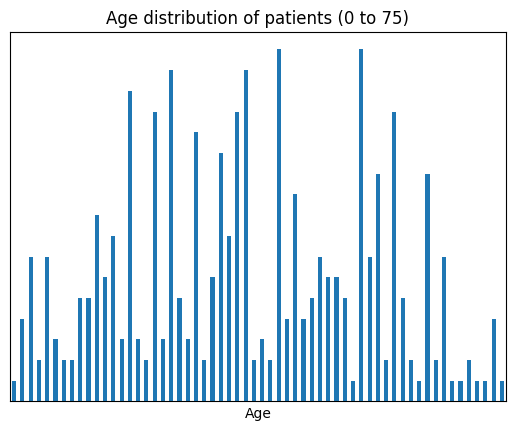

In [6]:
(df_v2.Age
   .value_counts()
   .sort_index()
   .plot(kind="bar", yticks=[], xticks=[], 
         title="Age distribution of patients "
               f"({df_v2.Age.min():.0f} to {df_v2.Age.max():.0f})"));

What value we might impute as "typical" for this data set? 

358 rows have specific ages, all in the reasonable range of human lifespans.  Eight rows have missing values.  

There are a number of familiar ways of identifying the "central tendency" of a data collection.  Ones that stand out are mode, median, mean, geometric mean, and less often harmonic mean.

Geometric mean is useful when data cover several orders of magnitude.  Often these are the same kinds of data you would plot using a log scale axis.  Measurements concerning exponental growth are often appropriately "averaged" with geometric mean.  Harmonic mean is useful when you are comparing *rates* of action.  For example, if you have a feature that measures the velocity of some objects, the typical value is best measured as harmonic mean.  

Keep in mind that these several averages are often numerically close to each other, and since an imputation is a guess to begin with, the choice among them *may* be striving for a *false precision*.

In [7]:
df_v2.Age.mean().round(), df_v2.Age.median()

(36.0, 35.0)

In [8]:
df_v2.Age.mode()

0    40.0
1    50.0
Name: Age, dtype: float64

For data collections that have a more-or-less linear distribution, including a normal distribution, one of the more commonplace averages is appropriate. 

We might try the modal age of the patients as a good representation.  However, this data set has a multi-modal distribution, which is common in small data.  Moreover, with ages between 0 and 80 years, and only 358 data points, the data is generally "lumpy."  Mode is probably not a good approach; but it could be if one value predominated.

In this case, nothing particularly jumps out as a likely candidate.  There are a few peaks only slightly less than the two modes, and no prevalent pattern to the noisy data.

Most likely mean or median are better representative.  These values come out close to each other while both are notably different from both modes.

Year | Median Age | Year | Median Age
-----|------------|------|------------
1950 | 19.7       | 1990 | 21.7
1955 | 19.4       | 1995 | 23.0
1960 | 19.6       | 2000 | 24.5
1965 | 18.4       | 2005 | 26.4
1970 | 18.5       | 2010 | 28.2
1975 | 19.1       | 2015 | 29.8
1980 | 19.5       | 2020 | 31.6
1985 | 20.5       

<center>(Source: WTO, 2018; 2020 projected)</center>

Another approach uses domain knowledge to make more informed choices about a value to impute.  For example, the metadata describing this data set indicates that it was developed by several Turkish researchers and published in 1998.  Patient confidentiality prohibits disclosure of more precise details, but we might consult historical demographic data, such as this table obtained from [Statista](https://www.statista.com/), based on World Trade Organization data sets.  The median age in Turkey in 1998 appears to be approximately 24 years old.

If our domain knowledge ran deeper than this population information, we might also have knowledge about general age correlations with skin conditions.  As a non-expert, I tend to assume that such conditions generally increase with age, but good imputation should have a basis beyond only a vague hunch.  

In [9]:
df_v3 = df_v2.copy()
df_v3.loc[df_v3.Age.isnull(), 'Age'] = df_v3.Age.median()
df_v3.Age.value_counts().head(10)

Age
35.0    22
40.0    17
50.0    17
27.0    16
36.0    16
22.0    15
55.0    14
25.0    14
30.0    13
33.0    12
Name: count, dtype: int64

For this lesson, I'll impute unknown ages as the median age *within the data itself*.

Imputed 35 year olds become a slightly over-represented, but not dramatically so.  Age-related tendencies should be reasonable for these imputed observations.

Probably the concern I've shown for finding a _typical values_ is excessive for the specific example used. However, thinking in the style we've walked through is very often crucial. As a responsible data scientist, you should think about *why* you make each decision you do in imputing values.

# Locality Imputation

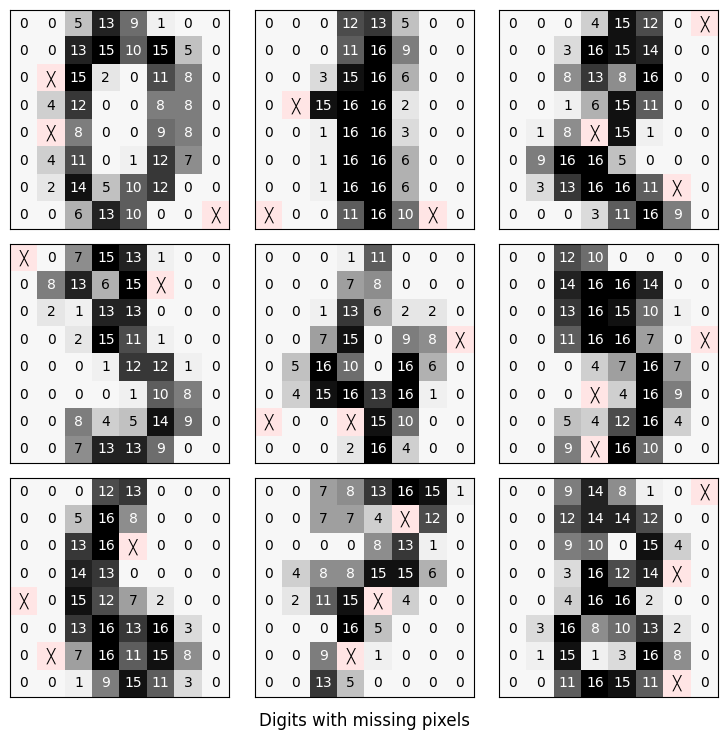

In [10]:
show_digits(digits, title="Digits with missing pixels")

Trends and locality are clearly related, in some sense.  For example, in a time series, the measurement taken at one particular minute is "local" to the measurement taken at the next minute by the same instrument.

Locality in general, however, is not specifically about sequence.  For example, in a dimensional space—whether directly representing a physical space, or concerning a parameter or phase space—locality might simply be "closeness" in the space.  Imputing values based on the other values that are nearby is often a reasonable way of filling in data we do not actually have.  In some cases, locality-based imputation is more likely to represent the underlying data than is assuming a global default value.

For example, the UCI Machine Learning Repository is a collection of [hand written digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) that might be recognized by an optical character recognition application.  These images include anti-aliasing, so that the actual strokes in black ink are typically surrounded by gray pixels of varying darkness. 

I have modified a subset of the UCI digit images by randomly dropping out some pixels.  In this representation, a missing gray-scale value is represented by -1.  The actual scanned pixel values are between 0 (white) and 16 (black). The data set is 50 samples of 8✕8 images. Each of the positions in the 8✕8 array is a a small integer. 

Each digit array has a few -1 values in it.  We can get a sense of the missing data by visualizing the pixels with shades along with values.  Several samples are shown, with each missing pixel in pink and containing an 'x' inside it.

In [11]:
def fill_missing(digit):
    digit = digit.copy()
    missing = np.where(digit == -1)
    for y, x in zip(*missing):  # Pull off x/y position of pixel
        # Do not want negative indices in slice
        x_start = max(0, x-1)
        y_start = max(0, y-1)
        x_end = x+2
        y_end = y+2
        # What if another -1 is in region? Remove all the -1s
        region = digit[y_start:y_end, x_start:x_end].flatten()
        region = region[region >=0]
        total = np.sum(region) 
        avg = total // region.size
        digit[y, x] = avg
    return digit

The function `fill_missing()` simply creates a single new digit based on adjacent digits.  We can easily construct a new data set by looping through the samples in the original one.

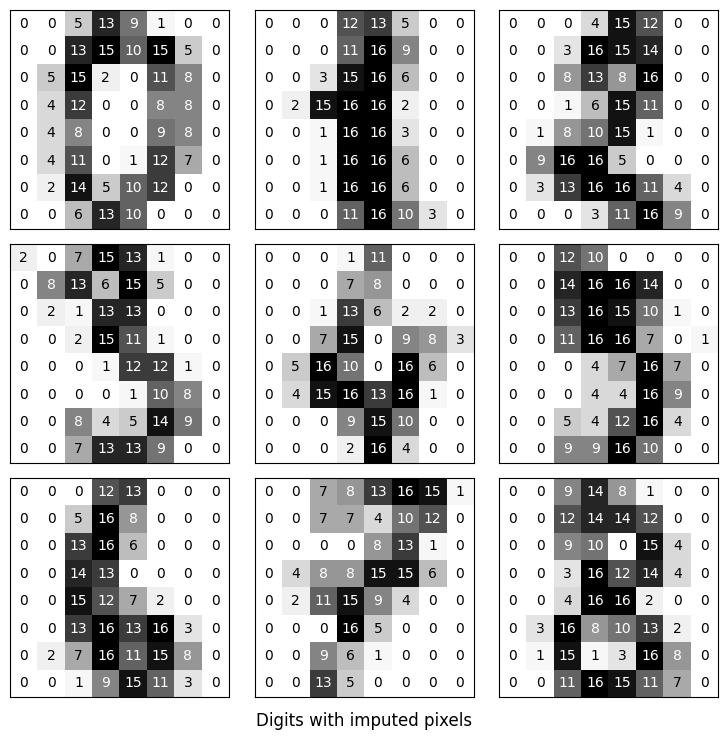

In [12]:
new = np.empty_like(digits)
for n in range(new.shape[0]):
    new[n] = fill_missing(digits[n])
show_digits(new, title="Digits with imputed pixels")

The specific adjacency averaging that I perform in the sample code is *often* a reasonable approach, and performs well in the example.  But you must always formulate a clear intention about what goal you have with your imputation. Think about how your approach might affect the modeling or analysis you perform later. Perhaps a different approach to imputation would work better with your selection of model.

# Trend Imputation

_The longer you stand in line, the greater the likelihood that you are standing in the wrong line._

–Anoynymous

The most obvious, and probably the most widely addressed, trend that data scientists use for imputation is time series data.  If we make observations on a relatively regular schedule—every femtosecond, every second, every minute, every year, every century—it is reasonable, to a first approximation, to guess that a missing observeration is similar to the timestamped observations nearby to it.  One very common use of trend imputation is in financial models; for example, market trades of securities may have irregular spacing of events (either missing data, or trades being less common than the tick frequency).  However, the same concerns arise with many other domains as well.

There are several general approaches to trend imputation available.  These include forward fill, backward fill, local regression, time-sensitive regression, non-local regression, and correlational imputation. One caveat in all the imputations I discuss in this section is that they cannot deal with high-frequency signals that have a shorter periodicity than the gaps in the missing data.  For example, if something can fluctuate on a stochastic 10 hertz frequency, one-second spaced observations are going to be of little value for imputation.  Obviously, to some degree it depends on the strength of overlapping signals, but this is a concern to keep in mind.

## Types of Trends

* Forward/backward fill

* Local regression

* Time-sensitive regression

* Non-local regression

* Correlation imputation

With **forward/backward fill** we assume that a missing value is the same as the value before/after it in the sequence.  The Pandas `Series.fillna()` method can perform this imputation, as can the `tidyr` package's `fill()` function in the R tidyverse.

With **local regression** we assume there is a continuous function connecting the observations adjacent to the missing one.  Most of the time we simply assume a linear function; e.g. we take the mean of those adjacent observations to fill the missing value. In concept we can impute a value based on adjacent points being samples for a non-linear function, however.

With **time-sensitive regression** we assume that even if we look only at values adjacent to missing ones, if those adjacent values represent datetimes, we might take advantage of the actual chronological spacing of observations.  If all observations are evenly spaced in time, this is moot.  The general intuition here is that values are likely to change more in a longer time period than in a shorter one.

With **non-local regression** we consider trends that are global or windowed over a wider range than adjacent elements. A linear regression is common, and is the simplest approach, but other functional forms for a regression are possible as well.  A global or windowed regression may be less sensitive to random local fluctuations in underlying trends.  Of course, the missing datum might have been such a fluctuation itself, so this approach amountd to a minor degree of smoothing of variability.

With **correlation imputation** we consider that the data within one feature with missing values is significantly correlated with the data in one or more other columns.  If this is the case, it may be that models downstream should recognize the cross-correlation, for example by decomposition and dimensionality reduction.  But as an initial imputation step, assuming values based on correlations is often useful.

In somewhat technical terms, we can note that imputation usually reduces heteroscedasticity since almost every kind of imputation follows a trend, not variability from that trend. For almost all data science purposes, that is desirable, or at least acceptable, but we should avoid stating many kinds of statistical generalizations on imputed data.  Such statistics are better performed using the raw data.

In [13]:
dates = pd.DataFrame({"day": date_series.index, "value": date_series})

In [14]:
GT(dates)

day,value
2001-01-01,-10.0
2001-01-05,1.0
2001-01-10,2.0
2001-02-01,
2001-02-05,4.0


Let's look at a simple time series example first, to illustrate several of these approaches.  We simply construct a small Series with date-level resolution, but uneven spacing of observation dates.  The first observation has a dramatically different value than later ones, mostly to emphasize that the implied global slope is different from the local differential between elements.

In [15]:
GT(dates.ffill())  # or .bfill()

day,value
2001-01-01,-10.0
2001-01-05,1.0
2001-01-10,2.0
2001-02-01,2.0
2001-02-05,4.0


Forward or backward fill are straightforward. We simply utilize the prior or next value to fill in missing data.

In [16]:
GT(dates.interpolate('linear'))

day,value
2001-01-01,-10.0
2001-01-05,1.0
2001-01-10,2.0
2001-02-01,3.0
2001-02-05,4.0


Local regression, which is simply "averaging," is also easy.  It's local in the sense of only utilizing the prior and next value rather than the entire data set.

In [17]:
dates["value"] = dates[["value"]].interpolate('time').round(2)
GT(dates)

day,value
2001-01-01,-10.0
2001-01-05,1.0
2001-01-10,2.0
2001-02-01,3.69
2001-02-05,4.0


In Pandas or other tools we can weight a trend based on time increments.  This is still a local operation, in the sense of utilizing adjacent values, but it is a weighted average based on the greater nearness of 2001-02-01 to 2001-02-05 than to 2001-01-10.  The extreme value of -10 that is non-adjacent is not utilized.

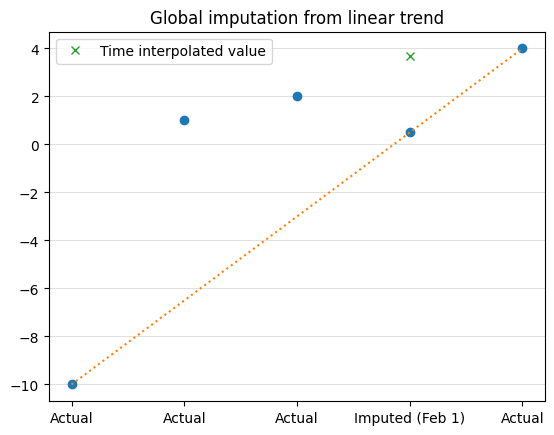

In [18]:
plot_filled_trend(date_series)

Given that this series is monotonically ascending, we can perform a simplified regression merely by drawing a line from the initial point to the final point.  This is not a least-squares linear regression, but it emphasizes the gap between uniform and time-based interpolation. The imputed value of 0.5 for February 1 might seem out of place, but if we visualize the global trend, it makes sense.  The ordinary least-squares also falls significantly below the time interpolated value, because one initial value is much lower than others later in series.

In [19]:
feat = 'follicular horn plug'
age_groups = derm.groupby(feat)[["Age"]].mean()
GT(age_groups.reset_index().round(2))

follicular horn plug,Age
0,37.7
1,20.4
2,10.62
3,9.75


We can also look for correlations among features to imput missing values.  For example, in the dermatology data used earlier in this chapter, some observed features are clearly correlated with the `Age` feature that is occassionally missing.

In this case, all of the medical observations are ordinal, but analogous approaches would apply to continuous features.  In particular, the feature `follicular horn plug` is strongly (and monotonically) negatively correlated with patient age.  We might simply assign each missing age based on the ordinal value of that other feature.

In [20]:
_derm = derm.copy()
missing = _derm.loc[derm.Age.isnull()].index  
_derm.loc[missing, 'Age'] = _derm[feat].map(age_groups.Age).round(2)
GT(_derm.loc[missing, [feat, 'scaling', 'itching', 'Age']])

follicular horn plug,scaling,itching,Age
0,2,0,37.7
0,1,0,37.7
0,2,2,37.7
0,1,3,37.7
0,1,2,37.7
0,1,3,37.7
0,1,2,37.7
0,1,3,37.7


A few lines of moderately dense Pandas code can assign to each missing `Age` based on the mean age of their grouping by the ordinal feature.  

It happens that in this particular data set, all the missing ages are among patients with zero degree of "follicular horn plug," but other data would likely be different. Perhaps there is something in the collection or collation methodology that caused this correlation; this is a different data bias issue we might examine elsewhere.

# A Larger Coarse Time Series

This real-world data setconcerns the tax-assessed market value of each property. The data were obtained by passing an SQL query over an HTTPS interface, and getting back a JSON result.  The particular query was:

```sql
SELECT parcel_number, year, market_value FROM assessments
```
From OpenDataPhilly (https://www.opendataphilly.org)

The City of Philadelphia, in the U.S. state of Pennsylvania, provides a resource called [OpenDataPhilly](https://www.opendataphilly.org) which is "a catalog of open data in the Philadelphia region.

In addition to being the official open data repository for the City, it includes data sets from many organizations in the region." The data set we work with in this section is valuable and good quality, but it also contains enough nuance that a number of cleanup steps will be required to shape it for our purpose.

A "parcel" is simply a tax/regulatory word for property under a common deed. OpenDataPhilly actually has complete information in this returned result, but for these examples I constructed a version with randomly missing values. Approximately 5% of the market values have been replaced by NaN for the missing data.

In [21]:
parcl = pd.read_json('data/philly_missing.json', dtype=int)
GT(parcl.sample(7, random_state=4))

parcel_number,year,market_value
123018500,2014,96100.0
888301242,2015,15000.0
,2018,0.0
311033500,2018,16500.0
888301508,2015,15000.0
252327300,2014,
314204200,2016,41800.0


The data used here contain a subset of the Philadelphia parcels, but we will assume they are representative.  Let's look at the data set and do some basic forensics before imputation.  It will take a number of steps to get "clean data" even when it was provided in rather good initial form.

In [22]:
nparcel = len(parcl[parcl.parcel_number.isnull()])
nmarket = len(parcl[parcl.market_value.isnull()])

print(f"All rows:  {len(parcl):>8,}")
print(f"No parcel: {nparcel:>8,}")
print(f"No market: {nmarket:>8,}")

All rows:    18,290
No parcel:    1,140
No market:      965


Each parcel has a market value in each of several years.  We saw in the prior slide that some `parcel_number` values are missing and some `market_value` values are missing.  

The `parcel_number` gap was in the data as I got it; the missing market values were constructed by me artifically.

I do not know why some results are returned with no parcel number, but under a stipulated goal of analyzing price trends over time, we cannot make any use of those.  The missing parcel numbers are a characteristic of the data as I obtained it.

Let's drop the unspecified parcels as unhelpful to our analysis.  

In [23]:
parcl = parcl[parcl.parcel_number.notnull()]
print(f"Remaining rows: {len(parcl):,}")
stds = parcl.groupby('parcel_number')['market_value'].std()
GT(pd.DataFrame(
    (stds // 1000 * 1000).value_counts())
   .reset_index().head())

Remaining rows: 17,150


market_value,count
0.0,2360
7000.0,114
6000.0,109
2000.0,103
3000.0,83


After this exclusion, what is the typical price vaiation is for one property over the five years included? We choose to look at the standard deviation in terms of thousand dollar ranges.

There are usually, but _not always_, five different years associated with each parcel.  Therefore the sum of the value counts adds up to a little bit more than ⅕ the total number of filtered rows.

It jumps out that the most common standard deviation, by far, seems to be the zero dollar range. 

In [24]:
stds[stds == 0].count()

2309

Since we rounded, some of those are not be an actual zero but simply an amount less than 1000 dollars.  On examination, the bulk of those parcels whose market value changed by a small amount, changed by exactly zero over the five years.  Moreover, the zero-change situation is around two-thirds of all the data.

## Removing Unusable Data

In [25]:
# Parcels that have no change between years (bool array)?
nochange = parcl.parcel_number.isin(stds[stds == 0].index)

# Parcel data grouped by parcel
by_parcel = parcl[nochange].groupby('parcel_number')

In [26]:
# Aggregate on number of market values and compare with 4
few_vals = by_parcel.market_value.count() < 4

# The parcel numbers that have fewer than 4 market values
few_index = few_vals[few_vals == True].index

# What are the actual row numbers we wish to drop
drop_rows = parcl[parcl.parcel_number.isin(few_index)].index

Let's perform several cleanups on the data set.  We'll accumulate Series for those parcels with no market value change and create a group by parcel number.

If fewer than 4 observations (years) exist, the parcel is not usable for the downstream analysis.  This is a domain specific judgement for this problem, not any universal rule.  The variable `drop_rows` contains the indices we will drop.

One subtlety to notice in the code is that the Pandas groupby operation ignores missing data for aggregations, even just for counting.  So if a group has three numeric values and two NaNs (i.e. five rows matching the category generically), not only will `.mean()` give the average of the three non-missing values, `.count()` will give the answer 3, not 5. 

The method `.size()` will include NaNs.

In [27]:
# New name and DataFrame holds the non-dropped rows
parcl2 = parcl.drop(drop_rows)

# We trim from 17,150 rows to 16,817
GT(parcl2.sample(10))

parcel_number,year,market_value
352079400,2018,88400.0
171038400,2018,54000.0
604125300,2015,62200.0
312002000,2018,109600.0
888300986,2015,332200.0
043120200,2016,89600.0
572341300,2018,178900.0
888300530,2016,157100.0
888301287,2017,15000.0
883091320,2017,129100.0


Our cleaned up data set looks something like what is shown. Let's turn to actual trend imputation.

In [28]:
# Aggregate group to find parcels w/ exactly four years
# The `by_parcel` group already assumes no change
four_vals = by_parcel.market_value.count() == 4
# The parcels numbers that have 4 market values
four_index = four_vals[four_vals == True].index
# Row numbers of parcels to impute on
impute_rows = parcl2[parcl2.parcel_number.isin(four_index)].index
# Group parcels only for parcels with 4 market values
by_four = parcl2.loc[impute_rows].groupby('parcel_number')
# Impute the mean (or identically median, etc) to rows
new_vals = by_four[["market_value"]].mean()
# A mapping of SOME parcel numbers to value
GT(new_vals.sample(5).reset_index())

parcel_number,market_value
071373000,52600.0
562355600,170400.0
663346200,181000.0
531253400,98800.0
042207200,30800.0


By stipulaton, when all but one year shows one common market value, the remaining year (with a missing value) should be imputed as the same value.  In some sense this is the "null trend," but it is also the same action as correlation imputation that we've seen.

Treating parcel number as a categorical variable, what we impute is a *typical* value which is also exactly the mean, median, min, max, and mode for the class.

In [29]:
# We keep a history of changes in different DFs
parcl3 = parcl2.copy()

# Loop through the new filled values by parcel
for n, (index, val) in enumerate(new_vals.market_value.items()):
    # Assignment will fill multiple rows, most redundantly
    parcl3.loc[parcl3.parcel_number == index, 'market_value'] = val
    # Did we start with only four rows in total?
    if len(parcl3.loc[parcl3.parcel_number == index]) == 4:
        print(f"Parcel #{index} has only 4 rows total (all ${val:,.0f})")

Parcel #352055600 has only 4 rows total (all $85,100)
Parcel #541286700 has only 4 rows total (all $116,600)
Parcel #621431100 has only 4 rows total (all $93,800)


In order to allow detection and display of the unusual condition we wish to note, this code is an explicit loop.  It is generally more idiomatic in Pandas—or in data frames generally—to vectorize the operation for speed.  

We could accomplish that in Pandas by using another `.groupby()`. For fewer than 20 thousand rows of data, the speed difference is not important, but for millions of rows it would be.

In [30]:
assert len(parcl2) == len(parcl3) == 16_817
print(f"Initial nulls in market_values: {sum(parcl2.market_value.isnull())}")
print(f"After filled 5th market_values: {sum(parcl3.market_value.isnull())}")

GT(parcl3[parcl3.market_value.notnull() &
       (parcl2.market_value != parcl3.market_value)]
    .sort_values('parcel_number')
    .sample(5))

Initial nulls in market_values: 775
After filled 5th market_values: 305


parcel_number,year,market_value
662582600,2018,183100.0
621433300,2017,91200.0
604134300,2014,69200.0
542434200,2017,111100.0
421142500,2016,65600.0


The cleaning we have done in this section has been relatively detailed. We should "check our work.  We would like `parcl3` to contain the same number of rows as `parcl2` since the missing value imputation should not change that. 

The missing values where 4 years are available should be filled in for `market_value`. We have not filled in other cases of missing `market_value`, however.

## Interpolation

In [31]:
s = pd.Series([None, 1, 2, None, 3, 4, None])
s.interpolate()

0    NaN
1    1.0
2    2.0
3    2.5
4    3.0
5    4.0
6    4.0
dtype: float64

We've done quite a bit of cleanup before arriving at trend imputation.  

Understanding data sets is always prerequisite.  Moreover, cleaning is very often required before we can perform the trend imputation itself. Fortunately, the actual trend imputation is extremely compact in Pandas and other similar data frame tools.

Filling in values will require two steps in the approach we choose here.  Linear (local) interpolation feels reasonable as an approach here.  With only five timesteps, and most market values not actually changing at all in the data set, any kind of global regression is not supportable for the example.  

In [32]:
s.interpolate().bfill()

0    1.0
1    1.0
2    2.0
3    2.5
4    3.0
5    4.0
6    4.0
dtype: float64

The default Pandas `.interpolate()` gives us *almost* what we want; however, it will not address a missing *first* element.  Since it operates in a forward fashion, the method defaults to forward-fill for trailing elements.  In order to assure a first element is imputed as well, we need to follow up with a backward-fill.

In [33]:
# Sort data to keep parcels together & years in order
parcl4 = parcl3.copy().sort_values(['parcel_number', 'year'])

# Interpolate per group
parcl4['market_value'] = (
    parcl4
    .groupby('parcel_number')
    .market_value
    .transform(pd.DataFrame.interpolate))

# Back fill per group
parcl4['market_value'] = (
    parcl4
    .groupby('parcel_number')
    .market_value
    .transform(pd.DataFrame.bfill))

There is a trick here to watch out for.  If we simply interpolated on the entire data frame, that would likely fill in some values based on the prior parcel.  

Specifically, if the first year associated with a parcel is NaN, we would get a meaningless trend between the last value of the prior parcel and the first value of the next parcel. Hence we need to operate in a group-based way.

We first make sure to order correctly by parcel numbers and year, then interpolate, then back fill.

In [34]:
print(f"Total rows after operations: {len(parcl4):,}")

# Overlooked missing data
GT(parcl4.loc[parcl4.market_value.isnull()])

Total rows after operations: 16,817


parcel_number,year,market_value
571291500,2018,


Now that we have completed our cleanup and trend imputation, we should do a sanity check on our data frame.

This final check reveals that there is one parcel for which only one year of data exists, and that hence has no trend to interpolate.  

In [35]:
# As read from disk (other than missing parcels)
GT(parcl.loc[parcl.parcel_number == "571291500"])

parcel_number,year,market_value
571291500,2018,


Let's validate that there really is only one year for that troublesome parcel.  We've done a many steps, and sanity checks are worthwhile.  We can query into the original version of our data frame.

Most likely we want to discard this row from our analysis as well.

## Non-Temporal Trends

In [36]:
krypt = pd.read_fwf('data/excited-kryptonite.fwf')
GT(krypt.sample(10, random_state=4).round(1))

Laser_type_kw,Subtype,Wavelength_nm,Kryptonite_type,candela_per_m2
Krypton,,530.9,Green,403.7
Argon,,351.0,Green,
Excimer,ArF,193.0,Gold,611.6
Argon,,528.7,Green,
Excimer,ArF,193.0,Red,
Krypton,,752.5,Green,395.0
Excimer,KrF,248.0,Gold,
Helium–neon,,3391.3,Red,409.3
Excimer,XeF,353.0,Red,623.4
CO2,,10600.0,Gold,603.2


For this section, I invent a whimsical data set that I believe has an interesting structure.  Apologies go out in advance to the solid-state physicists or quantum chemists among my readers who might note that even a comic-book metal cannot behave in the manner I purport.

Lex Luthor Laboratories has done a number of experiments that involve shining lasers at various forms of kryptonite, in their ever nefarious efforts to defeat Superman and rule the world.  In particular, they notice that many types of kryptonite gain a broad visual band luminance when exposed to lasers of various wavelengths.  Kryptonite being in scarce supply, they have not managed to test the behavior of all the element's crystal structures at all laser wavelengths.  Moreover, the kilowatt lasers they used are each in some specific frequencies, but they may hypothetically wish to develop weapons using different kinds of lasers than those used in the tests.

A data frame contains observations made by the lab. The units are measured in directional *candela* rather than overall *lumens* because lasers are focused in a single direction.

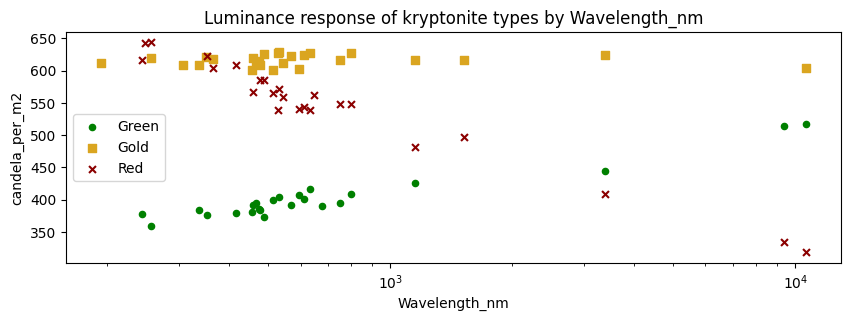

In [37]:
plot_kryptonite()

A visualization will make it evident that—at least within the range of laser wavelengths tested, each type of kryptonite tested—green, red, and gold—seems to have a different more-or-less log-linear response curve.  It remains possible that xenogenetic metals, being what they are, will have surprising characteristics under untested wavelengths.  At a first pass though, we basically have a regression problem.

In [38]:
GT(krypt[
    (krypt.Wavelength_nm > 1500) & 
    (krypt.Wavelength_nm < 10000)]
 .sort_values('Wavelength_nm'))

Laser_type_kw,Subtype,Wavelength_nm,Kryptonite_type,candela_per_m2
Helium–neon,,1520.0,Green,
Helium–neon,,1520.0,Red,497.592
Helium–neon,,1520.0,Gold,616.262
Helium–neon,,3391.3,Green,444.054
Helium–neon,,3391.3,Gold,624.755
Helium–neon,,3391.3,Red,409.322
CO2,,9400.0,Green,514.181
CO2,,9400.0,Red,334.444
CO2,,9400.0,Gold,


For current purposes, we are not necessarily interested in the full regression, but simply in imputing the *missing* observations.  In the table and the plot, you can see that some lasers in the test suite do not have available data against some types of kryptonite.  For example, the helium-neon laser at 1520㎚ was only tested against gold and red kryptonite.  And the CO₂ laser at 9400㎚ was only tested against the green and red kryptonite.

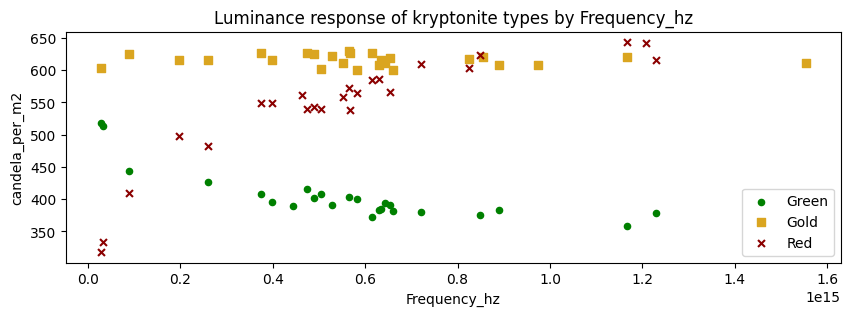

In [39]:
λ = krypt.Wavelength_nm / 10**9   # Wavelength in meters
c = 299_792_458                   # Speed of light in m/s
krypt['Frequency_hz'] = c/λ

# Plot frequency vs luminance
plot_kryptonite(df=krypt, logx=False, independent='Frequency_hz')

While the two measures are directly computable from each other, electromagnetic frequencies in the visible range occupy a more linear numeric range, whereas wavelengths span several orders of magnitude.  For our purposes, it might be friendlier to work with laser frequencies.

Visually, on a linear-linear plot using frequency, there clearly seems to be bend in the response curve for red kryptonite, and perhaps for the green as well.  Clearly the data is noisy, and does not closely match any smooth curve; whether this is because of the physical properties of the element or limitations in the experimental setup we do not know. 

In [40]:
# Only perform the polyfit on the non-missing data
kr_vals = (krypt[krypt.candela_per_m2.notnull()]
           .sort_values('Frequency_hz'))

# Do a fit for each kryptonite color
for color in ('Red', 'Green', 'Gold'):
    # Limit to the color being fit
    kcolor = kr_vals.loc[kr_vals.Kryptonite_type == color]
    x = kcolor["Frequency_hz"]
    y = kcolor["candela_per_m2"]
    coef2, coef1, offset = np.polyfit(x, y, deg=2)
    
    # Print out the discovered coefficients
    print(f"{color:>5s} (hz → nit): "
          f"{coef2:.1e}*x^2 + {coef1:.1e}*x + {offset:.1e}")

    # Use coefficients to fill missing values
    kmissing = krypt.loc[krypt.candela_per_m2.isnull() & 
                         (krypt.Kryptonite_type == color)]
    x = kmissing.Frequency_hz
    krypt.loc[x.index, 'candela_per_m2'] = (
                            coef2*x**2 + coef1*x + offset)

  Red (hz → nit): -2.6e-28*x^2 + 5.5e-13*x + 3.5e+02
Green (hz → nit): 1.4e-28*x^2 + -2.7e-13*x + 5.0e+02
 Gold (hz → nit): -4.1e-30*x^2 + 2.8e-15*x + 6.2e+02


With this motivation, we might perform a polynomial fit of order higher than one.  Numpy offers an easy mechanism to find polynomial fits.  We try a quadratic in the example.

Following determining the coefficients of our polynomial, we can use them to impute the missing values. We do all of this per-color, under the assumption that each color-state of kryptonite will show a different behavior.

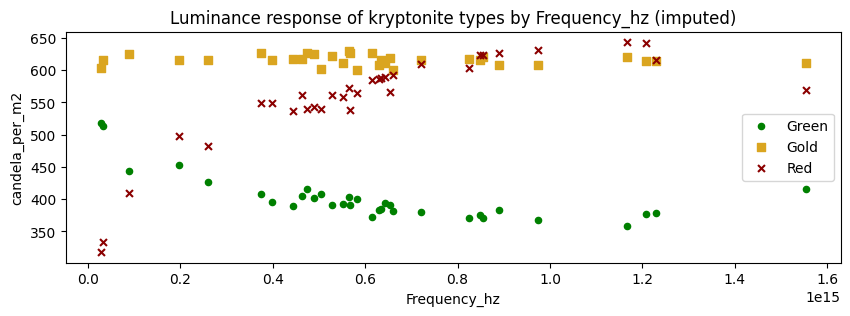

In [41]:
plot_kryptonite(df=krypt, logx=False, imputed=True,
                independent='Frequency_hz')

Plotting again with the missing data imputed based on the polynomial fit, none of the new points appear obviously out of place.  Whether they are *correct* is, of course, something that requires much more domain knowledge.  At least our regression behaves as we expected it to.

By imputation, we have “filled in” all explicitly missing values, which makes many statistical tests and machine learning algorithms possible that are not without doing this. 

# Sampling

In [42]:
humans = pd.read_csv('data/height-weight.csv')
GT(humans.head(10).round(2))

Height,Weight
167.09,51.25
181.65,61.91
176.27,69.41
173.27,64.56
172.18,65.45
174.49,55.93
177.3,64.18
177.84,61.9
172.47,50.97
169.63,54.73


Sampling is modification of a data set in order to rebalance it in some manner.  An imbalance can reflect *either* the data collection techniques used *or* the underlying pattern of the phenomenon you are measuring.  This imbalance can be particularly clear when a variable is categorical and there is an obvious explicit count of the class distribution.  A special kind of sampling is *time series resampling* which is discussed in chapter 7 (*Feature Engineering*).

An imbalance can also be relevant where the distribution of a continuous variable is merely uneven.  This is very common, since many quantities—in some sense, probably most quantities one can measure—are distributed unevenly, such as in a normal distribution or beta distribution.  For this purpose we exclude extremely "long tailed" distributions such as power law distributions or exponential distributions.  That is, a continuous value that simply has peaks within a comparatively narrow range presents a different issue than a value that spans many orders of magnitude.  Often it is useful to transform a long tailed distribution into a more linear one, for example by taking the log of the original values or discretizing the values into quantiles.

A simple example of a roughly normal distribution is human heights.  Drilling into the details, the actual data is probably somewhat bimodal based on sex, and may have additional second-order patterns by nationality, age, and so on.  For this simple illustration, the imbalance itself is sufficient for illustration.  Obviously humans vary in height, but even between the shortest newborn and the tallest adult, it is less than a 5x difference.  Among adults only (excluding some very rare, very short people), it is almost always within 1.5x.  In other words, height is essentially a linear quantity; but it is not one uniformly distributed.

The examples in this section will shift to using the R Tidyverse rather than Python.  Python data frame libraries—both Pandas and others—make everything shown equally easy; the switch is made under the assumption that more readers are more familiar with Python, as an effort to encourage readers to think about the concepts rather than the libraries narrowly.

We can read in a data set containing physical measurements of [25,000 (simulated) humans](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights#References).  For our purposes here, we just want to look at how height is distributed.

Dividing the heights into regular numeric increments we definitely see a vaguely Gaussian distribution, at least inasmuch as middling heights occur much more often than the shorter or taller ranges.  Even so, all humans in this sample—and almost all adults generally—are in the narrow range from 153㎝ to 191㎝.

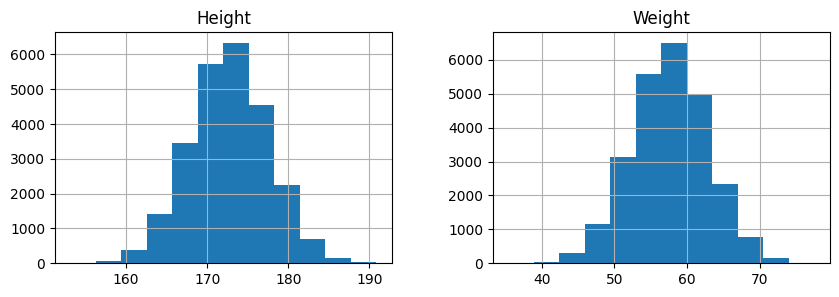

In [43]:
humans.hist(figsize=(10,3), bins=12);

If height were the target we were trying to predict from other features (e.g. nutrition, nationality, gender, age, income, etc), for many kinds of machine learning models, the rare classes ("very short", "very tall") would nearly or absolutely never be predicted from other features.  There are simply too many people who are similar in those other measures to the small number (about 0.5% in the sample) of very short people that the default prediction would simply be "somewhat short" if not even just "average."

Note, however, that a similar problem exists if regions of the parameter space of the independent variables are imbalanced.  For example, if Indonesia or The Netherlands each had only a few samples in the hypothetical training set (but other nations many), we would be able to make little use of the fact that residents of those countries (as of this writing) had the shortest and tallest average heights, respectively.  Moreover, if the small number of samples included especially short Dutch people or especially tall Indonesian people, the presence of the class value might bias the prediction in exactly the opposite direction from what we would like.

### Undersampling

> The devil is in the details.<br/>–Einstürzende Neubauten

Let us look at a data set that uses actual categorical values rather than artificially discretized ranges.  The UCI Machine Learning 1997 [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) is useful here.  The original data set uses a variety of categorical words for ordinal values, such as the trunk being "small", "med", or "big", or the price of maintenance being "low", "med", "high", or "vhigh."  These are converted to sequential integer for this book.  However, the overall rating that we will focus on is left as descriptive words, even though it is also in an obvious implicit order.

In [44]:
%%capture --no-stdout err
%%R
cars <- read_csv('data/cars.csv', 
                 col_types = cols("i", "i", "i", "i", "i", "i", "f"))
cars

Imagine that we were trying to predict the "acceptability" of a car based on other recorded characteristics it has.  It stands out that in the first ten rows, a large number are unacceptable.  Let us look at the overal class distribution of the rating.

In [45]:
%%R
table(cars$rating)

UsageError: Cell magic `%%R` not found.


The evaluators of these cars are perhaps rather fussy in finding so very few of them good or very good.  In any case, this shows a strong imbalance in the rating feature, which we will perhaps use as the target in our classification model.  We would like to clean our training data in a manner likely to produce higher quality models.  Keep in mind that different specific modeling techniques are more, or less, likely to be impoved by sampling techniques than others.  For example, linear models are largely insensitive to class imbalance, while K-nearest neighbor models tend to be highly sensitive to these issues.  But even within a generalization of that sort, different sampling, of different data sets and domains, will be effective to varying degrees.  The choice of downstream model matters a lot.

If three things hold, undersampling is unproblematic:

* We have a great many rows in the data set;
* Even the uncommon classes have a reasonable number of samples;
* The parameter space is well covered by the samples.

If we are lucky enough to have all those conditions hold, simply selecting a sample size of the smallest class is adequate.  However, if we cannot reach those conditions—in particular, if the smallest classes are a bit too small—permitting a degree of imbalance is generally not terrible.  50:1 imbalance is likely to be a problem, 2:1 is likely to be unimportant.  For our car evaluation, let us attempt to find 100 samples from each class, but settle for as many as we have.  Having fewer than 100 samples of the uncommon classes in this data set does not give us very much leeway.

In [ ]:
%%R
unacc <- sample(which(cars$rating == "Unacceptable"), 100)
acc <- sample(which(cars$rating == "Acceptable"), 100)
good <- sample(which(cars$rating == "Good"), 69)
vgood <- sample(which(cars$rating == "Very Good"), 65)
samples <- slice(cars, c(vgood, good, acc, unacc))
samples

Here we manually selected the number of rows available per class, and did not use higher level libraries like **DMwR** (Data Mining with R), **caret** (Classification And REgression Training), or **ROSE** (Random Over-Sampling Examples), which would make the sampling somewhat more concise.  These packages each include a variety of more sophisticated sampling techniques, some of which we will use shortly.  In the Python world, the package **imbalanced-learn** is the go-to choice, and includes most of the techniques in the mentioned R packages.<sup><i>packages</i></sup>

Let use take a look at the distribution we obtained to make sure we did the intended thing.

In [ ]:
%%R
samples %>%
  group_by(rating) %>%
  count()

Having only 60-some samples available at all from the uncommon classes is probably too sparse.  To a large extent, a class having few samples simply cannot cover the parameter space of the features, no matter what technique we use.  The 100 samples we have selected from the larger classes is not very much larger, but we can reasonably hope that since the underlying populations are much larger, and our sampling is unbiased, these samples are less likely to wholly miss parameter regions.

While sampling is imperfect, we can at least avoid a target imbalance which is likely to bias our model by combining undersampling with oversampling.  Let us take 150 samples from each class by allowing replacement (and hence duplication from low-count classes).

In [ ]:
%%R
# Find indices for each class (dups OK)
indices <- unlist(
  lapply(
    # For each level of the rating factor,
    levels(cars$rating), 
    # sample with replacement 150 indices
    function(rating) {
      pred <- which(cars$rating == rating)
      sample(pred, 150, replace = TRUE) }))

# Check that we have drawn evenly
slice(cars, indices) %>%
  group_by(rating) %>%
  count()

### Oversampling

> God dwells in the details.<br/>–Ludwig Mies van der Rohe (c.f. Gustave Flaubert)

When data is plentiful, undersampling is a quick way of producing more balanced training data for machine learning models.  Most often data sets do not cover your parameter space so well that you can simply throw away training data with pure undersampling.  Even if you have quite a few observations, even the common classes will cluster around a prototypic region of the high dimensional space.  If you need to evaluate the parameter space as sensitively as possible, discarding data is risky.  Of course, it can also merely be the case that with the type of model and amount of computational resources you have, you simply cannot train a model on a full data set; if so, undersampling has an independent appeal, and class sensitivity in doing it is entirely a good thing.

We have already seen how to perform the simplest kind of oversampling.  In the car evaluation data set, for example, we could simply sample with replacement up to the count of the most common class.  Exactly that technique would create some noise in that most common class since some samples would be repeated and others omitted.<sup><i>sampling</i></sup> 

<div id="sampling"
     style="display: inline-block; margin: 0 5% 0 5%; border-style: solid; border-width: 1px">
    <i>sampling</i><br/>
The most straightforward approach to resampling per class does not differentiate the most common class from other classes.  This means that if the most common class has 100 items, resampling with replacement will omit approximately 36 of them in the resampled version, and duplicate other items.  In contrast, resampling to 100 items from a class that has only 10 initial items will with near certainty represent each item at least once.<br/><br/>

In concept, we could use extra code to do something somewhat more "fair".  We would create a copy of the original data. Then we would sample only `max_class_size-current_class_size` items from each other class. Then we would combine the untouched original with the new samples.  This at least would make sure that every original appears at least once in the resulting data.  While this approach might be an improvement, it remains less nuanced than approaches like SMOTE, discussed below.
</div>

Another approach is simply duplicating uncommon classes as many times as are needed to make them reach approximate parity with the more common ones.  For example:

In [ ]:
# Read the raw data and count most common rating
cars = pd.read_csv('data/cars.csv')
cars2 = cars.copy()  # Modify a copy of DataFrame
most_common = max(cars2.rating.value_counts())

for rating in cars2.rating.unique():
    # A DataFrame of only one rating class
    rating_class = cars2[cars2.rating == rating]
    # Duplicate one less than overshooting most_common
    num_dups = (most_common // len(rating_class)) - 1
    for _ in range(num_dups):
        cars2 = pd.concat([cars2, rating_class])

cars2.rating.value_counts()

This approach brings each uncommon class as close to the frequency of the plurality class as is possible without being non-uniform in the duplication.  That is, if we wanted *exactly* 1210 "Acceptable" samples, we would duplicate some samples one more time than we had other samples.  Allowing a very slight imbalance is a better approach.

More interesting than naive oversampling is a technique called Synthetic Minority Over-sampling Technique (SMOTE), and a closely related one called Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN).  In R there are a number of choices for performing the SMOTE and similar techniques.  Libraries include smotefamily, DMwR, and ROSE for a related but slightly different technique.  For the next few code examples, however, we will use Python's imbalanced-learn instead, if only because there are fewer choices among the libraries needed.

While there are some technical differences among several techniques in the SMOTE family, they all are generally similar.  What they do is generate *new data points* using K-nearest neighbor techniques.  Among the minority samples, they look at the several nearest neighbors in the parameter space of features, and then create a new synthetic sample within that region of the parameter space which is not identical to *any* existing observation.  In an informal sense, we might call this "fuzzy" oversampling.  Of course, the class or target assigned to this synthetic point is the same as that of the cluster of minority class observations already existing.  The bottom line is that this kind of oversampling with fuzziness in feature values usually creates much more useful synthetic samples than does a crude oversampling.

As discussed above, the cars rating classes are starkly imbalanced.

In [ ]:
cars.rating.value_counts()

Several similar oversampling techniques are available in imbalanced-learn.  Read the documentation of the library for evolving details.  All of them are built on top of the same scikit-learn API, and they may be included within scikit-learn pipelines and otherwise interoperate with that library.  You do not need to use scikit-learn to use imbalanced_learn, except in the behind-the-scenes way that it utilizes K-nearest neighbors from that library.

Similar to the package name scikit-learn being imported under the module name `sklearn`, the installation package we use is named imbalanced-learn, but it is imported as `imblearn`.

In [ ]:
# Only define the feature and target matrices, use in next cell
from imblearn.over_sampling import SMOTE

# Divide data frame into X features and y target
X = cars.drop('rating', axis=1)
y = cars['rating']

# Create the resamples features/target
X_res, y_res = SMOTE(k_neighbors=4).fit_resample(X, y)

Let us combine the features and target back into a DataFrame similar to the original.

In [ ]:
synth_cars = X_res.copy()
synth_cars['rating'] = y_res
synth_cars.sample(8, random_state=2)

As we wish, the classes of the target are exactly balanced.  We could alter the sampling strategy not to require an exact balance, but in this case exactness is reasonable.

In [ ]:
synth_cars.rating.value_counts()

A small point is worth noticing here.  Unlike the several R libraries that peform SMOTE, imbalanced-learn retains the data type of the features.  In particular, the ordinal integers of the features are kept as integers.  This may or may not be what you want.  Semantically, an evaluation of `price_buy` from "low" to "very high" could sensibly be encoded as a continuous value in the 0-3 range.  However, the number of doors is semantically an integer.  Still, if "more doors is better" for you as a consumer, there is likely no harm in a synthetic row with slightly nonsensible literal meaning.

More important than the direct interpretation of a given feature value is how useful the value is to your model.  For many kinds of models, continuous variables provide more useful clustering, and most likely you will prefer to train on floating-point inputs. Let us cast our data types to floats and perform the resampling again, taking note of some of the new non-integral feature values. 

In [ ]:
cars.iloc[:, :6] = cars.iloc[:, :6].astype(float)
cars.head()

In [ ]:
# Divide data frame into X features and y target
X = cars.drop('rating', axis=1)
y = cars['rating']

# Create the resamples features/target
X_, y_ = SMOTE().fit_resample(X, y)
pd.concat([X_, y_], axis=1).sample(6, random_state=4)

## Denouement

> Never answer the question that is asked of you. Answer the question 
> that you wish had been asked of you.<br/>–Robert McNamara

**Topics**: Central Tendency; Correlated Tendencies; Trend Imputation; Locality; Undersampling; Oversampling

In this chapter we looked at two related, but slightly different, main concepts.  On the one hand, it is often useful to impute individual values where data is missing.  When we do this, we can use a variety of patterns in the data and/or facts we know about the underlying domain that the data is drawn from.  Sometimes we impute values based on what is typical for a given variable, sometimes conditioning typicality on a particular region of parameter space.  Other times we find trends in data that can be sequenced in some manner, and impute based on those trends.

Under the second aspect, a kind of imputation occurs with sampling as well.  In the case of oversampling, we straightforwardly impute entirely new synthetic samples, either simply by repeating existing ones or using aggregation techniques to extrapolate what is typical of an uncommon class.  However, even in the case of undersampling, there is a kind of imputation going on.  Undersampling a data set does not change any individual values, but it absolutely changes the *distribution* of the remaining data.  That is, after, all the whole point: we wish to create relative balance within a categorical or range variable that the original data set does not follow.

For data science and data analysis, your burden is always to take the crude material that is presented to you in raw form, and give it a form suitable for modeling and analytic purposes.  In the next chapter we move on to looking at *feature engineering* and creation of novel synthetic features.